#### Logistic Regression
#### https://github.com/sharmaroshan/Heart-UCI-Dataset/blob/master/heart.csv

In [4]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt  
import seaborn as sns  

In [5]:
# Load dataset
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
# Check missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Prepare Features and Target
# Define X and y
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-Test Split
# Split the data - training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [10]:
# Train the Logistic model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Model Prediction and Eval
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.881578947368421

Confusion Matrix:
 [[30  5]
 [ 4 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [12]:
# Curve
# Logistic Regression Curve Visualization (Example using 'age' feature)
age_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300).reshape(-1, 1)
age_range_scaled = scaler.transform(age_range)  # Scale the age range
probs = model.predict_proba(age_range_scaled)[:, 1]  # Probability for class 1 (heart disease)

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.plot(age_range, probs, color='blue', label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression Curve for Predicting Heart Disease')
plt.legend()
plt.show()


C:\Users\baron\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but StandardScaler is expecting 13 features as input.

C:\Users\baron\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


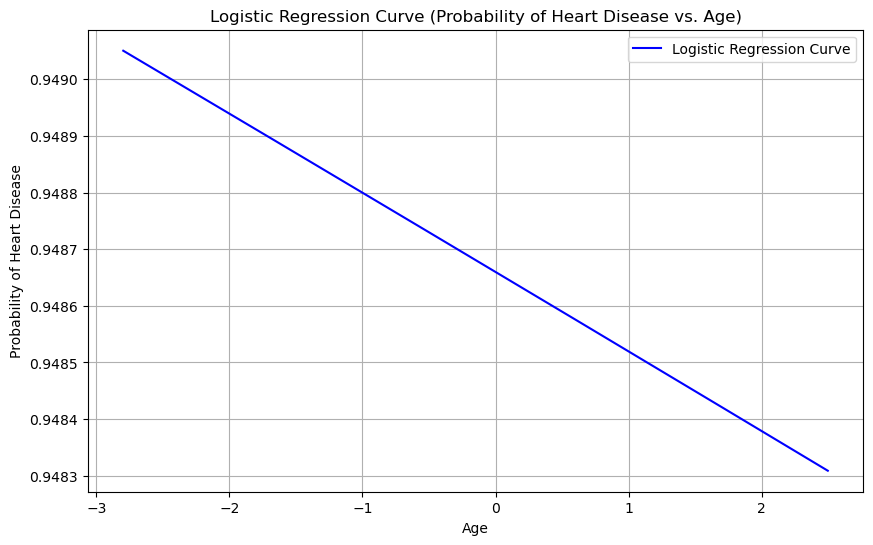

In [14]:
import numpy as np
import matplotlib.pyplot as plt
age_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300).reshape(-1, 1)
mean_values = np.mean(X_train, axis=0)
age_range_full = np.hstack([age_range, np.tile(mean_values[1:], (age_range.shape[0], 1))])
age_range_scaled = scaler.transform(age_range_full)  # Use the same scaler as used for X_train
probs = model.predict_proba(age_range_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(age_range, probs, color='blue', label='Logistic Regression Curve')
plt.title('Logistic Regression Curve (Probability of Heart Disease vs. Age)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [16]:
# Add add new data
new_data = np.array([[45, 1, 2, 130, 250, 0, 1, 180, 0, 1.2, 2, 0, 2]])
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Scale the new data using the same scaler used for the training set
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction for the new data
new_prediction = model.predict(new_data_scaled)

# Output the prediction
print("Prediction for the new data row:", "Heart Disease" if new_prediction[0] == 1 else "No Heart Disease")

Prediction for the new data row: Heart Disease
